## MIBI

In [12]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pysodb

In [3]:
sc.set_figure_params(vector_friendly=False,format='pdf',transparent=True,dpi=50)
plt.rcParams["figure.figsize"] = (8, 8)

sns.set_style('white')

#### load a data using pysodb

In [4]:
sodb = pysodb.SODB() # Initialization

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/urllib3-1.26.12-py3.9.egg/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gene.ai.tencent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [5]:
# this data is from publication "A Structured Tumor-Immune Microenvironment in Triple Negative Breast Cancer Revealed by Multiplexed Ion Beam Imaging"


In [6]:
# link in SODB: https://gene.ai.tencent.com/SpatialOmics/dataset?datasetID=47

In [7]:
adata = sodb.load_experiment('keren2018a','p4')
# the first parameter is the name of the dataset
# the second parameter is the name of one experiment in the dataset

load experiment[p4] in dataset[keren2018a] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/pysodb/cache/keren2018a/p4.h5ad


In [8]:
adata

AnnData object with n_obs × n_vars = 6643 × 36
    obs: 'SampleID', 'cellLabelInImage', 'cellSize', 'C', 'Na', 'Si', 'P', 'Ca', 'Fe', 'Background', 'B7H3', 'OX40', 'CD163', 'CSF-1R', 'Ta', 'Au', 'tumorYN', 'tumorCluster', 'Group', 'immuneCluster', 'immuneGroup', 'group_name', 'immuneGroup_name', 'all_group_name', 'leiden'
    uns: 'all_group_name_colors', 'group_name_colors', 'immuneGroup_name_colors', 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

### play with Squidpy


#### display clusters

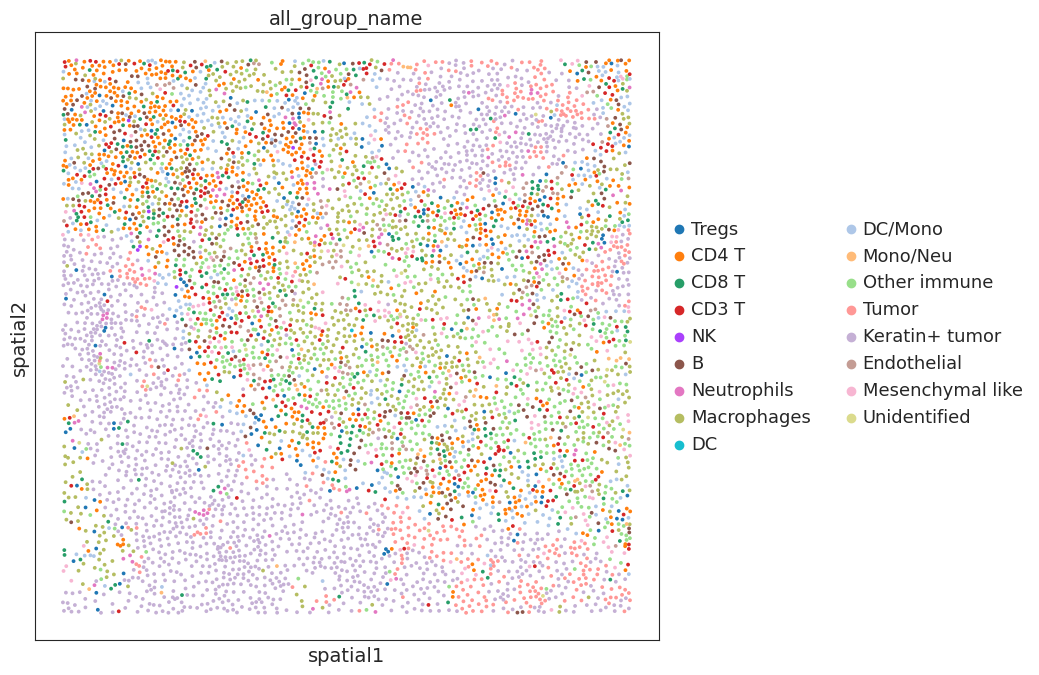

In [9]:
sc.pl.embedding(adata,basis='spatial',color='all_group_name',s=30)

#### Neighborhood enrichment

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1896.20/s]
/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/squidpy-1.1.2-py3.9.egg/squidpy/gr/_nhood.py:182: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/squidpy-1.1.2-py3.9.egg/squidpy/pl/_graph.py:239: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion

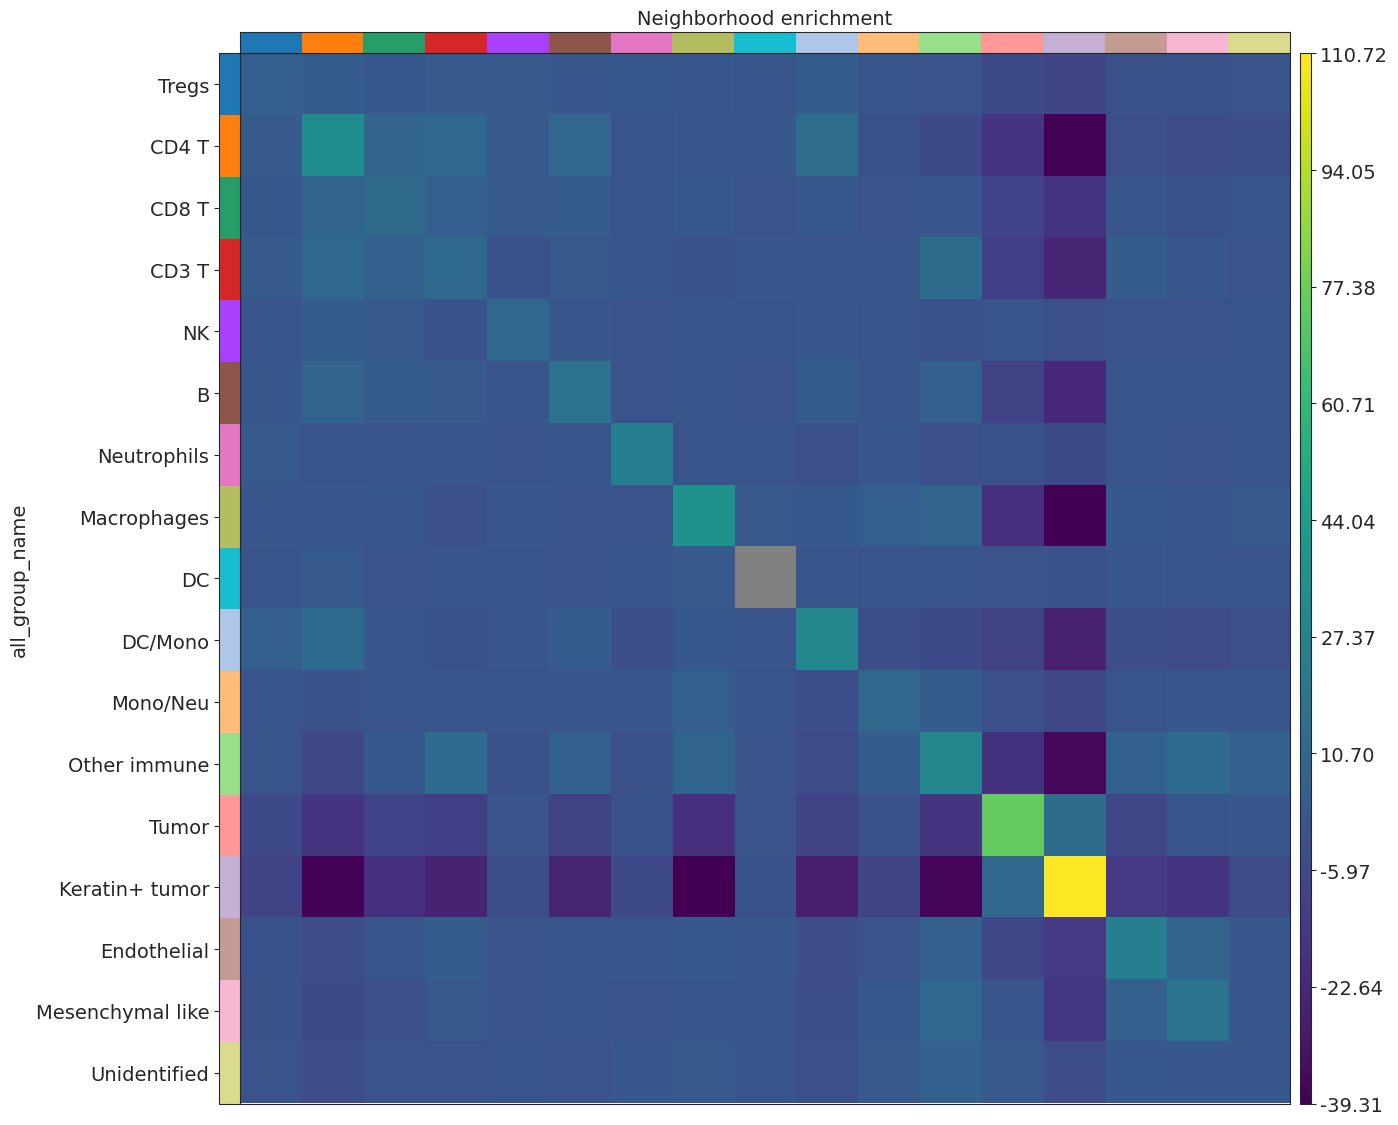

In [13]:
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="all_group_name")
sq.pl.nhood_enrichment(adata, cluster_key="all_group_name")

#### Interaction matrix and network centralities

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/squidpy-1.1.2-py3.9.egg/squidpy/pl/_graph.py:176: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  ad = AnnData(X=array, obs={cluster_key: pd.Categorical(adata.obs[cluster_key].cat.categories)})


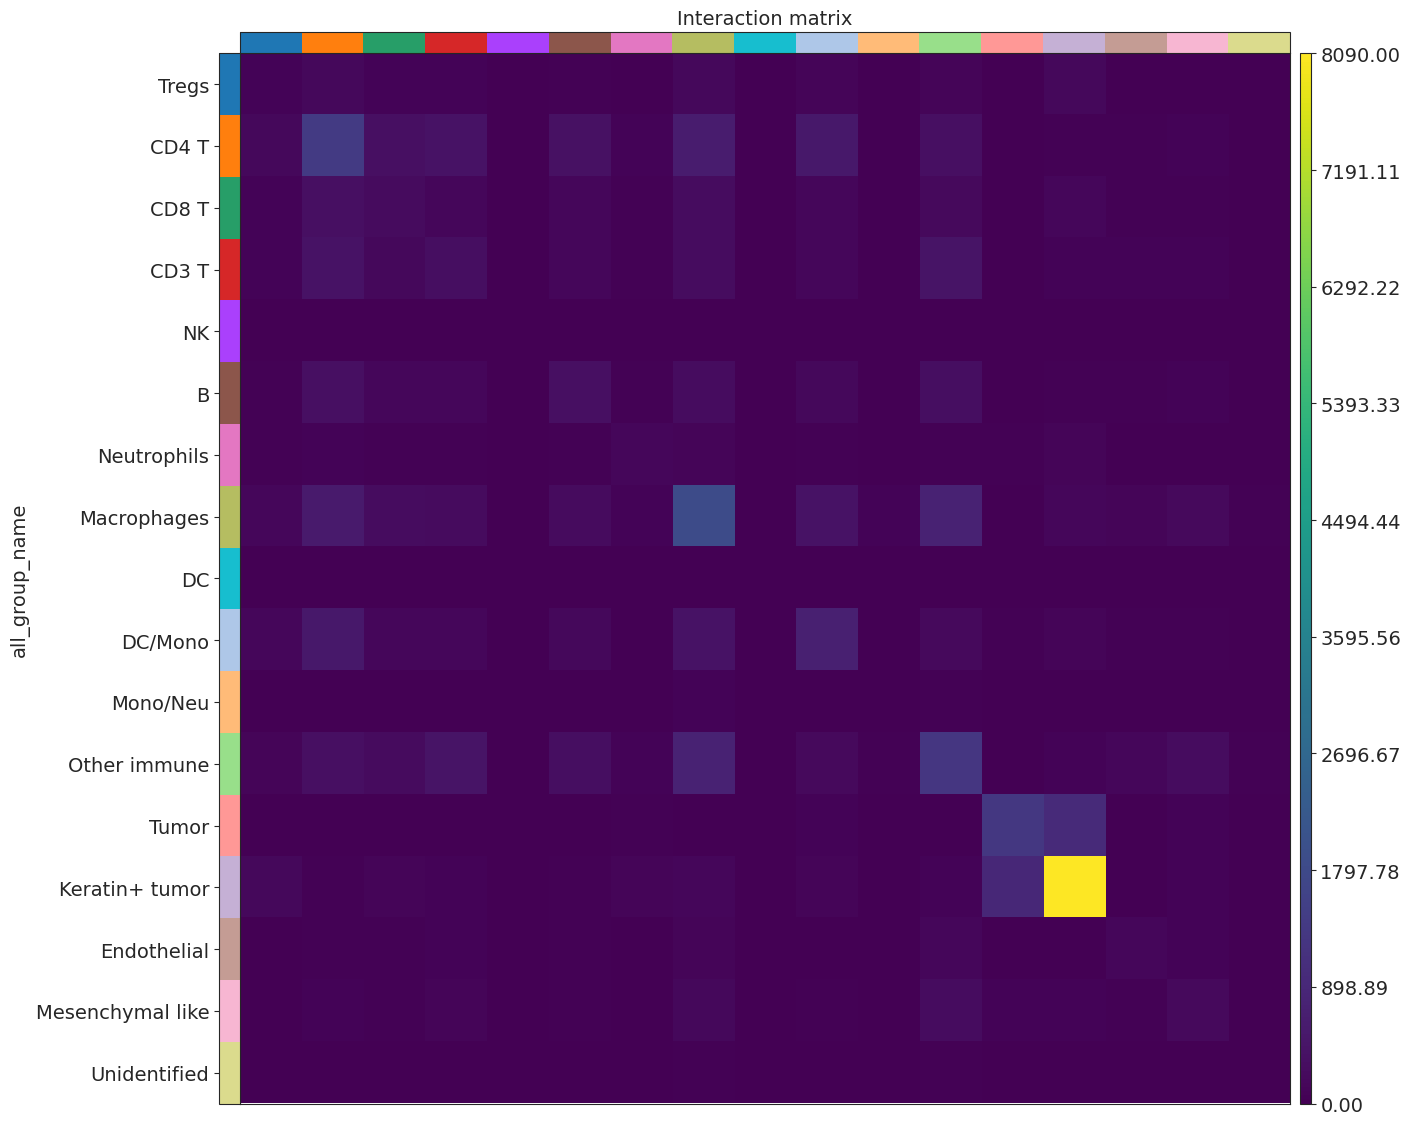

In [14]:
sq.gr.interaction_matrix(adata, cluster_key="all_group_name")
sq.pl.interaction_matrix(adata, cluster_key="all_group_name")

#### centrality score analysis

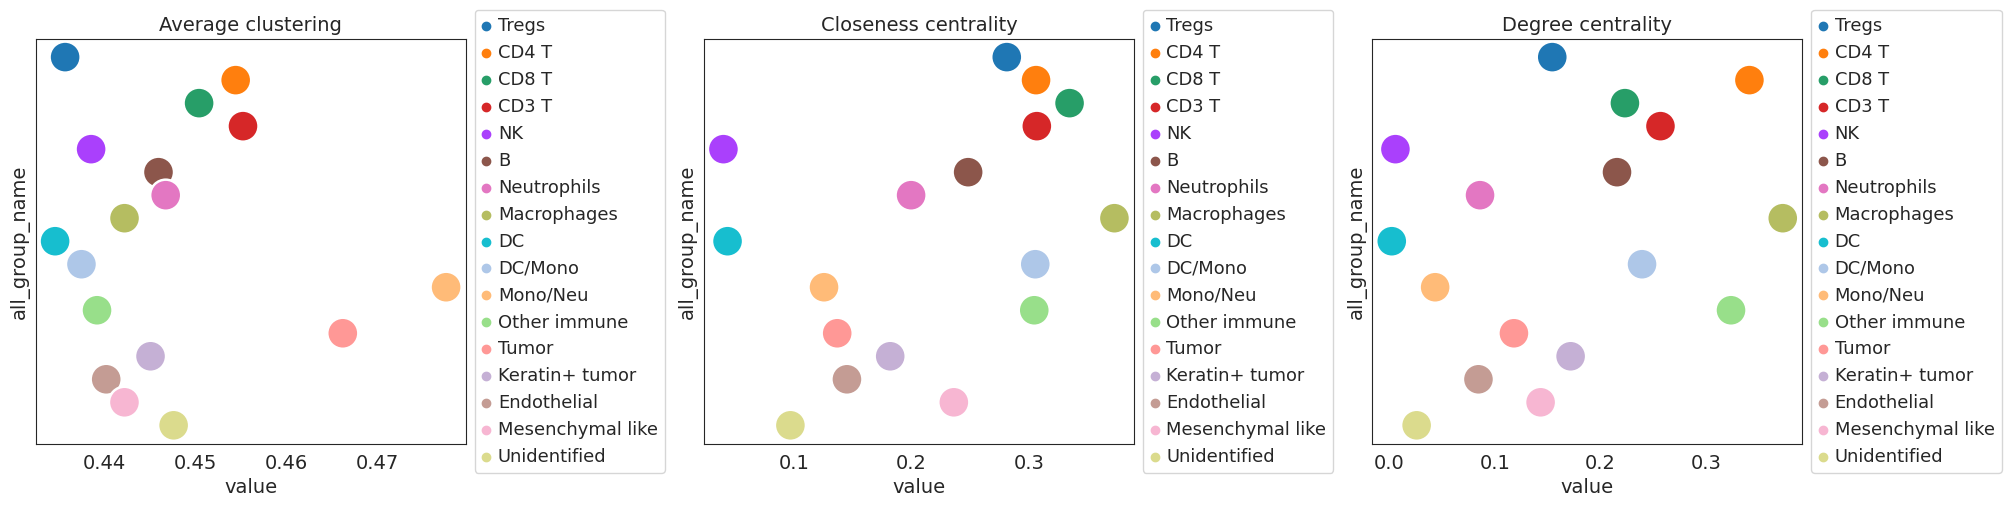

In [15]:
sq.gr.centrality_scores(
    adata,
    cluster_key="all_group_name",
)
sq.pl.centrality_scores(adata, cluster_key="all_group_name", figsize=(20, 5), s=500)